In [2]:
import pandas as pd
import os
import re

/tmp/ipykernel_1378952/561376880.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_excel(r"../data/raw/Durham_University_Museums_data.xlsx")

In [4]:
pd.set_option("display.max_rows", None)

print(df["object_number"].str.extract(r"(^[^\d]*)")[0].value_counts())
pd.reset_option("display.max_rows")

0
DUROM.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [5]:
root_dir = "../data/raw/images/"

names = [
    ".".join(file.split(".")[:-1]) for root, dirs, files in os.walk(root_dir) for file in files
]
names_w_end = [file for root, dirs, files in os.walk(root_dir) for file in files]

In [6]:
names

['1985.15.68',
 '1985.52.37.ff2',
 '1985.81.4496 d2',
 '1985.9.1.1-d4',
 '1985.52.37.sf2',
 '1985.52.35 ll',
 '1985.1.4 d1',
 '1985.52.5.ff',
 '1985.1.4 d2',
 '1985.1.5 d1',
 '1985.100.19.6-bb',
 '1985.78.1-bb',
 '1985.52.35 tt',
 '1985.15.124a',
 '1985.64.130 d1',
 '1985.9.1.3-d1',
 '1985.100.19.5-ff',
 '1985.11.6 d1',
 '1985.64.218-ff',
 '1985.10.8 ff',
 '1985.64.834-d2',
 '1985.64.223 d4',
 '1985.64.221-ll',
 '1985.64.831-d1',
 '1985.64.121.2 d2',
 '1985.64.222-ff',
 '1985.15.36ff',
 '1985.100.19.8-bb',
 '1985.64.222-bb',
 '1985.64.1243 uu',
 '1985.100.62 d4',
 '1985.52.5.bb',
 '1985.52.35 bb',
 '1985.64.220 d4',
 '1985.10.10 ff',
 '1985.100.19.1-ff',
 '1985.64.1243 d4',
 '1985.81.314.1-tt',
 '1985.11.6 d2',
 '1985.1.6 d1',
 '1985.64.851 d1',
 '1985.64.1243 d1',
 '1985.64.223 d3',
 '1985.64.130 d2',
 '1985.62.1-uu',
 '1985.64.861-d1',
 '1985.15.20',
 '1985.1.7 d1',
 '1985.1.4 d3',
 '1985.100.19.2-bb',
 '1985.10.11 ff',
 '1985.64.220 d1',
 '1985.81.4497 d1',
 '1985.81.4497 d2',
 '198

In [7]:
def cut_string(string):
    match = re.search(r"(\d.*?)(?=[a-zA-Z])", string)
    if match:

        string2 = string[: match.end()]
        reversed_string = string2[::-1]  # Reverse the string
        match2 = re.search(r"[0-9]+", reversed_string)  # Find the first digit character
        if match2:
            index = match2.start()  # Get the index of the first digit character
            return string2[:-index]  # Return the original string up to that index from the end
        return string2  # Return the original string if no digit character is found
    return string


def filename_to_db(row, db, lower_db):
    """Return matching object_number from db for a given filename."""
    filename = row["filename"]
    cut = row["cut"]
    if filename in db.values:
        return filename

    elif cut in lower_db:
        return db[lower_db == cut].values[0]

    else:
        return None


def split_string(string):
    return ".".join(string.split(".")[:-1])


def underscore_to_dot(string):
    return string.replace("_", ".")


def cut_trailing_letters(string):
    return re.sub(r"[a-zA-Z]+$", "", string)


def cut_trailing_letters2(string):
    return re.sub(r"[a-zA-Z.-]+$", "", str(string))


def split_string2(string):
    if "." in string:
        return ".".join(string.split(".")[:-1])
    else:
        return string


def split_slash(string):
    if "/" in string:
        return "".join(string.split("/")[:-1])
    else:
        return string


def split_slash2(string):
    if "/" in string:
        split = string.split("/")
        return "".join(string.split("/")[:-1]) + "".join([split[-1]])
    else:
        return string


def split_dash(string):
    if "-" in string:
        return ".".join(string.split("-")[:-1])
    else:
        return string


def split_dash2(string):
    if "-" in string:
        return ".".join(string.split("-")[:-2])
    else:
        return string


def split_dash3(string):
    if "-" in string:
        return "".join(string.split("-")[0])
    else:
        return string


def split_dash4(string):
    if "," in string:
        return "".join(string.split(",")[0])
    else:
        return string


def split_dash5(string):
    if " " in string:
        return "".join(string.split(" ")[0])
    else:
        return string


def split_dash6(string):
    if "-" in string:
        return "".join(string.split("-"))
    else:
        return string


def split_dash7(string):
    if "," in string:
        return "".join(string.split(","))
    else:
        return string


def split_dash8(string):
    if "." in string:
        return "".join(string.split("."))
    else:
        return string


def split_n(string):
    if "n" in string:
        return string.split("n")[0]
    else:
        return string

In [8]:
names = [
    ".".join(file.split(".")[:-1]) for root, dirs, files in os.walk(root_dir) for file in files
]
names_w_end = [file for root, dirs, files in os.walk(root_dir) for file in files]
roots = [root for root, dirs, files in os.walk(root_dir) for file in files]

In [9]:
file_df = pd.DataFrame([names, names_w_end, roots], index=["filename", "full_filename", "root"]).T
for function in [
    cut_string,
    split_string,
    underscore_to_dot,
    cut_trailing_letters,
    cut_trailing_letters2,
    split_string2,
    split_slash,
    split_slash2,
    split_dash,
    split_dash2,
    split_dash3,
    split_dash4,
    split_dash5,
    split_dash6,
    split_dash7,
    split_dash8,
    split_n,
]:
    file_df[function.__name__] = file_df["filename"].apply(function)
    file_df["durom" + function.__name__] = file_df[function.__name__].apply(lambda x: "durom." + x)
    file_df["durma" + function.__name__] = file_df[function.__name__].apply(lambda x: "durma." + x)

file_df["record"] = None


print(file_df["record"].isna().sum())


mask = file_df["filename"].isin(df["object_number"].str.lower())
file_df.loc[mask, "record"] = file_df.loc[mask, "filename"]
print(file_df["record"].isna().sum())


def mask_and_assign(df, file_df, column):
    mask = file_df[column].isin(df["object_number"].str.lower()) & file_df["record"].isna()
    file_df.loc[mask, "record"] = file_df.loc[mask, column]
    print(f'Column {column} matched. {file_df["record"].isna().sum()} records remaining.')


df["cut_obj"] = df["object_number"].str.lower().apply(lambda x: cut_trailing_letters2(x))

cut_obj2obj = df.set_index("cut_obj")["object_number"].to_dict()


def mask_and_assign2(df, file_df, column):
    mask = (
        file_df[column].isin(
            df["object_number"].str.lower().apply(lambda x: cut_trailing_letters2(x))
        )
        & file_df["record"].isna()
    )
    file_df.loc[mask, "record"] = file_df.loc[mask, column].apply(lambda x: cut_obj2obj[x])
    print(f'Column {column} matched cut. {file_df["record"].isna().sum()} records remaining.')


for column in file_df.columns[3:]:
    mask_and_assign(df, file_df, column)
    mask_and_assign2(df, file_df, column)
    # mask_and_assign3(df, file_df, column)

39244
38799
Column cut_string matched. 27135 records remaining.
Column cut_string matched cut. 26659 records remaining.
Column duromcut_string matched. 9409 records remaining.
Column duromcut_string matched cut. 8046 records remaining.
Column durmacut_string matched. 7626 records remaining.
Column durmacut_string matched cut. 7626 records remaining.
Column split_string matched. 6409 records remaining.
Column split_string matched cut. 6406 records remaining.
Column duromsplit_string matched. 4305 records remaining.
Column duromsplit_string matched cut. 4134 records remaining.
Column durmasplit_string matched. 4091 records remaining.
Column durmasplit_string matched cut. 4091 records remaining.
Column underscore_to_dot matched. 4089 records remaining.
Column underscore_to_dot matched cut. 4089 records remaining.
Column duromunderscore_to_dot matched. 3730 records remaining.
Column duromunderscore_to_dot matched cut. 3730 records remaining.
Column durmaunderscore_to_dot matched. 3659 reco

In [10]:
for function in [
    cut_string,
    split_string,
    underscore_to_dot,
    cut_trailing_letters,
    split_string2,
    split_slash,
    split_slash2,
    split_dash,
    split_dash2,
    split_dash3,
    split_dash4,
    split_dash5,
    split_dash6,
    split_dash7,
    split_dash8,
    split_n,
]:
    file_df[function.__name__] = file_df["filename"].apply(function)
    file_df["durom" + function.__name__[-1]] = "durom." + file_df[function.__name__]

Check to see whether the images match those in the dataset

In [11]:
df["cut_obj"] = df["object_number"].str.lower().apply(lambda x: cut_trailing_letters2(x))

# cut_obj2obj = df.set_index("cut_obj")["object_number"].to_dict()

In [12]:
df[df["object_number"] == "DUROM.1991.102.a-b"]

object_number object_name other_name  \
17900  DUROM.1991.102.a-b     Ink Pot        NaN   

                        reproduction.reference  \
17900  ../images/oriental/1991/1991.102-d3.jpg   

                                             description label.text  \
17900  Circular hardstone ink paste pot with detachab...        NaN   

        material technique physical_description number_of_parts  ...  \
17900  soapstone       NaN                  NaN             NaN  ...   

      Unnamed: 26 Unnamed: 27 Unnamed: 28 Unnamed: 29 Unnamed: 30 Unnamed: 31  \
17900         NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 32 Unnamed: 33 Unnamed: 34         cut_obj  
17900         NaN         NaN         NaN  durom.1991.102  

[1 rows x 36 columns]

In [13]:
file_df

filename        full_filename  \
0           1985.15.68       1985.15.68.jpg   
1       1985.52.37.ff2   1985.52.37.ff2.jpg   
2      1985.81.4496 d2  1985.81.4496 d2.jpg   
3        1985.9.1.1-d4    1985.9.1.1-d4.jpg   
4       1985.52.37.sf2   1985.52.37.sf2.jpg   
...                ...                  ...   
39239      2014.1.2 bb      2014.1.2 bb.jpg   
39240     2014.1.71 ll     2014.1.71 ll.jpg   
39241      2014.1.2 rr      2014.1.2 rr.jpg   
39242           1963.4           1963.4.jpg   
39243         1963.4.2         1963.4.2.jpg   

                                       root    cut_string     duromcut_string  \
0      ../data/raw/images/fulling_mill/1985    1985.15.68    durom.1985.15.68   
1      ../data/raw/images/fulling_mill/1985    1985.52.37    durom.1985.52.37   
2      ../data/raw/images/fulling_mill/1985  1985.81.4496  durom.1985.81.4496   
3      ../data/raw/images/fulling_mill/1985    1985.9.1.1    durom.1985.9.1.1   
4      ../data/raw/images/fulling_mill/1985    1985.52.37    durom.1985.52.37   
...                                     ...           ...                 ...   
39239      ../data/raw/images/egyptian/2014      2014.1.2      durom.2014.1.2   
39240      ../data/raw/images/egyptian/2014     2014.1.71     durom.2014.1.71   
39241      ../data/raw/images/egyptian/2014      2014.1.2      durom.2014.1.2   
39242      ../data/raw/images/egyptian/1963        1963.4        durom.1963.4   
39243      ../data/raw/images/egyptian/1963      1963.4.2      durom.1963.4.2   

          durmacut_string split_string duromsplit_string durmasplit_string  \
0        durma.1985.15.68      1985.15     durom.1985.15     durma.1985.15   
1        durma.1985.52.37   1985.52.37  durom.1985.52.37  durma.1985.52.37   
2      durma.1985.81.4496      1985.81     durom.1985.81     durma.1985.81   
3        durma.1985.9.1.1     1985.9.1    durom.1985.9.1    durma.1985.9.1   
4        durma.1985.52.37   1985.52.37  durom.1985.52.37  durma.1985.52.37   
...                   ...          ...               ...               ...   
39239      durma.2014.1.2       2014.1      durom.2014.1      durma.2014.1   
39240     durma.2014.1.71       2014.1      durom.2014.1      durma.2014.1   
39241      durma.2014.1.2       2014.1      durom.2014.1      durma.2014.1   
39242        durma.1963.4         1963        durom.1963        durma.1963   
39243      durma.1963.4.2       1963.4      durom.1963.4      durma.1963.4   

      underscore_to_dot  ...                 duroms                 durom2  \
0            1985.15.68  ...       durom.1985.15.68       durom.1985.15.68   
1        1985.52.37.ff2  ...   durom.1985.52.37.ff2   durom.1985.52.37.ff2   
2       1985.81.4496 d2  ...  durom.1985.81.4496 d2  durom.1985.81.4496 d2   
3         1985.9.1.1-d4  ...    durom.1985.9.1.1-d4                 durom.   
4        1985.52.37.sf2  ...   durom.1985.52.37.sf2   durom.1985.52.37.sf2   
...                 ...  ...                    ...                    ...   
39239       2014.1.2 bb  ...        durom.2014.1.2       durom.2014.1.2 bb   
39240      2014.1.71 ll  ...       durom.2014.1.71      durom.2014.1.71 ll   
39241       2014.1.2 rr  ...        durom.2014.1.2       durom.2014.1.2 rr   
39242            1963.4  ...           durom.1963.4           durom.1963.4   
39243          1963.4.2  ...         durom.1963.4.2         durom.1963.4.2   

                      duromh                 durom3                 durom4  \
0           durom.1985.15.68       durom.1985.15.68       durom.1985.15.68   
1       durom.1985.52.37.ff2   durom.1985.52.37.ff2   durom.1985.52.37.ff2   
2      durom.1985.81.4496 d2  durom.1985.81.4496 d2  durom.1985.81.4496 d2   
3           durom.1985.9.1.1       durom.1985.9.1.1    durom.1985.9.1.1-d4   
4       durom.1985.52.37.sf2   durom.1985.52.37.sf2   durom.1985.52.37.sf2   
...                      ...                    ...                    ...   
39239      durom.2014.1.2 bb      durom.2014.1.2 bb     

In [14]:
cut_obj2obj

{'eg1': 'EG1',
 'eg2': 'EG2',
 'eg3': 'EG3',
 'eg4': 'EG4',
 'eg5': 'EG5',
 'eg6': 'EG6',
 'eg7': 'EG7',
 'eg8': 'EG8',
 'eg9': 'EG9',
 'eg10': 'EG10',
 'eg11': 'EG11',
 'eg12': 'EG12',
 'eg13': 'EG13',
 'eg14': 'EG14',
 'eg15': 'EG15',
 'eg16': 'EG16',
 'eg17': 'EG17',
 'eg18': 'EG18',
 'eg19': 'EG19',
 'eg20': 'EG20',
 'eg21': 'EG21',
 'eg22': 'EG22',
 'eg23': 'EG23',
 'eg24': 'EG24',
 'eg25': 'EG25',
 'eg26': 'EG26',
 'eg27': 'EG27',
 'eg28': 'EG28',
 'eg29': 'EG29',
 'eg30': 'EG30',
 'eg31': 'EG31',
 'eg32': 'EG32',
 'eg33': 'EG33',
 'eg34': 'EG34',
 'eg35': 'EG35',
 'eg36': 'EG36',
 'eg37': 'EG37',
 'eg38': 'EG38',
 'eg39': 'EG39',
 'eg40': 'EG40',
 'eg41': 'EG41',
 'eg42': 'EG42',
 'eg43': 'EG43',
 'eg44': 'EG44',
 'eg45': 'EG45',
 'eg46': 'EG46',
 'eg47': 'EG47',
 'eg48': 'EG48',
 'eg49': 'EG49',
 'eg50': 'EG50',
 'eg51': 'EG51',
 'eg52': 'EG52',
 'eg53': 'EG53',
 'eg54': 'EG54',
 'eg55': 'EG55',
 'eg56': 'EG56',
 'eg57': 'EG57',
 'eg58': 'EG58',
 'eg59': 'EG59',
 'eg60': 'EG60'

In [15]:
file_df

filename        full_filename  \
0           1985.15.68       1985.15.68.jpg   
1       1985.52.37.ff2   1985.52.37.ff2.jpg   
2      1985.81.4496 d2  1985.81.4496 d2.jpg   
3        1985.9.1.1-d4    1985.9.1.1-d4.jpg   
4       1985.52.37.sf2   1985.52.37.sf2.jpg   
...                ...                  ...   
39239      2014.1.2 bb      2014.1.2 bb.jpg   
39240     2014.1.71 ll     2014.1.71 ll.jpg   
39241      2014.1.2 rr      2014.1.2 rr.jpg   
39242           1963.4           1963.4.jpg   
39243         1963.4.2         1963.4.2.jpg   

                                       root    cut_string     duromcut_string  \
0      ../data/raw/images/fulling_mill/1985    1985.15.68    durom.1985.15.68   
1      ../data/raw/images/fulling_mill/1985    1985.52.37    durom.1985.52.37   
2      ../data/raw/images/fulling_mill/1985  1985.81.4496  durom.1985.81.4496   
3      ../data/raw/images/fulling_mill/1985    1985.9.1.1    durom.1985.9.1.1   
4      ../data/raw/images/fulling_mill/1985    1985.52.37    durom.1985.52.37   
...                                     ...           ...                 ...   
39239      ../data/raw/images/egyptian/2014      2014.1.2      durom.2014.1.2   
39240      ../data/raw/images/egyptian/2014     2014.1.71     durom.2014.1.71   
39241      ../data/raw/images/egyptian/2014      2014.1.2      durom.2014.1.2   
39242      ../data/raw/images/egyptian/1963        1963.4        durom.1963.4   
39243      ../data/raw/images/egyptian/1963      1963.4.2      durom.1963.4.2   

          durmacut_string split_string duromsplit_string durmasplit_string  \
0        durma.1985.15.68      1985.15     durom.1985.15     durma.1985.15   
1        durma.1985.52.37   1985.52.37  durom.1985.52.37  durma.1985.52.37   
2      durma.1985.81.4496      1985.81     durom.1985.81     durma.1985.81   
3        durma.1985.9.1.1     1985.9.1    durom.1985.9.1    durma.1985.9.1   
4        durma.1985.52.37   1985.52.37  durom.1985.52.37  durma.1985.52.37   
...                   ...          ...               ...               ...   
39239      durma.2014.1.2       2014.1      durom.2014.1      durma.2014.1   
39240     durma.2014.1.71       2014.1      durom.2014.1      durma.2014.1   
39241      durma.2014.1.2       2014.1      durom.2014.1      durma.2014.1   
39242        durma.1963.4         1963        durom.1963        durma.1963   
39243      durma.1963.4.2       1963.4      durom.1963.4      durma.1963.4   

      underscore_to_dot  ...                 duroms                 durom2  \
0            1985.15.68  ...       durom.1985.15.68       durom.1985.15.68   
1        1985.52.37.ff2  ...   durom.1985.52.37.ff2   durom.1985.52.37.ff2   
2       1985.81.4496 d2  ...  durom.1985.81.4496 d2  durom.1985.81.4496 d2   
3         1985.9.1.1-d4  ...    durom.1985.9.1.1-d4                 durom.   
4        1985.52.37.sf2  ...   durom.1985.52.37.sf2   durom.1985.52.37.sf2   
...                 ...  ...                    ...                    ...   
39239       2014.1.2 bb  ...        durom.2014.1.2       durom.2014.1.2 bb   
39240      2014.1.71 ll  ...       durom.2014.1.71      durom.2014.1.71 ll   
39241       2014.1.2 rr  ...        durom.2014.1.2       durom.2014.1.2 rr   
39242            1963.4  ...           durom.1963.4           durom.1963.4   
39243          1963.4.2  ...         durom.1963.4.2         durom.1963.4.2   

                      duromh                 durom3                 durom4  \
0           durom.1985.15.68       durom.1985.15.68       durom.1985.15.68   
1       durom.1985.52.37.ff2   durom.1985.52.37.ff2   durom.1985.52.37.ff2   
2      durom.1985.81.4496 d2  durom.1985.81.4496 d2  durom.1985.81.4496 d2   
3           durom.1985.9.1.1       durom.1985.9.1.1    durom.1985.9.1.1-d4   
4       durom.1985.52.37.sf2   durom.1985.52.37.sf2   durom.1985.52.37.sf2   
...                      ...                    ...                    ...   
39239      durom.2014.1.2 bb      durom.2014.1.2 bb     

In [16]:
filtered_df = df[df["object_number"].str.lower().isin(file_df["record"])]
# drop columns if all missing
filtered_df["obj_num_old"] = filtered_df["object_number"]
filtered_df["obj_num"] = filtered_df["object_number"].str.lower()
filtered_df = filtered_df[
    [
        "obj_num",
        "description",
        "object_name",
        "other_name",
        "material",
        "number_of_parts",
        "production.date.start",
        "production.date.end",
        "production.period",
        "production.place",
        "obj_num_old",
    ]
]

/tmp/ipykernel_1378952/888087169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["obj_num_old"] = filtered_df["object_number"]
/tmp/ipykernel_1378952/888087169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["obj_num"] = filtered_df["object_number"].str.lower()


In [17]:
file_df[["record"]]

record
0        durma.1985.15.68
1        durma.1985.52.37
2      durma.1985.81.4496
3          durma.1985.9.1
4        durma.1985.52.37
...                   ...
39239      durom.2014.1.2
39240     durom.2014.1.71
39241      durom.2014.1.2
39242        durom.1963.4
39243        durom.1963.4

[39244 rows x 1 columns]

In [18]:
file_df[["full_filename", "root", "record"]]
file_df = file_df.rename(columns={"record": "obj_num", "full_filename": "file"})
file_df = file_df[["file", "root", "obj_num"]]

## Testing

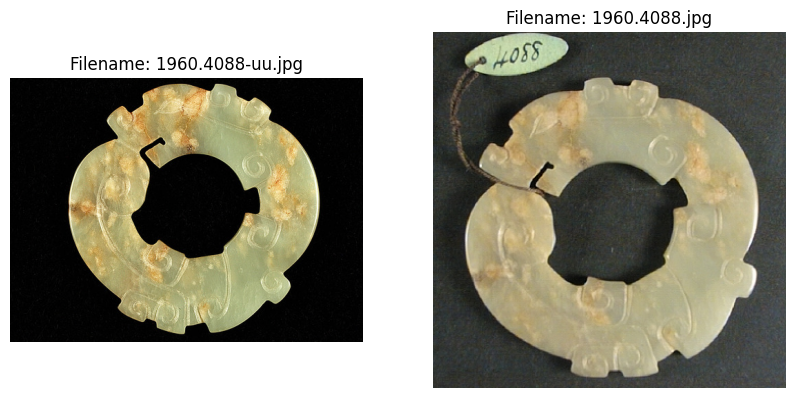

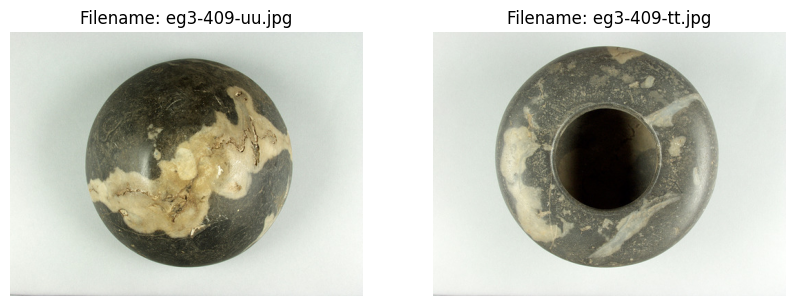

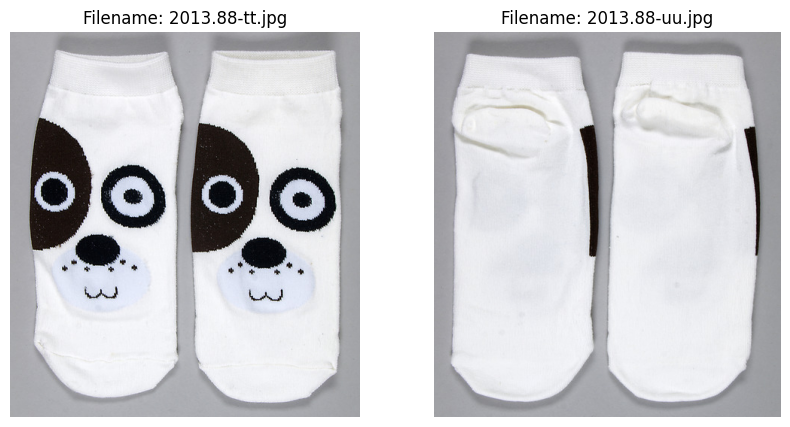

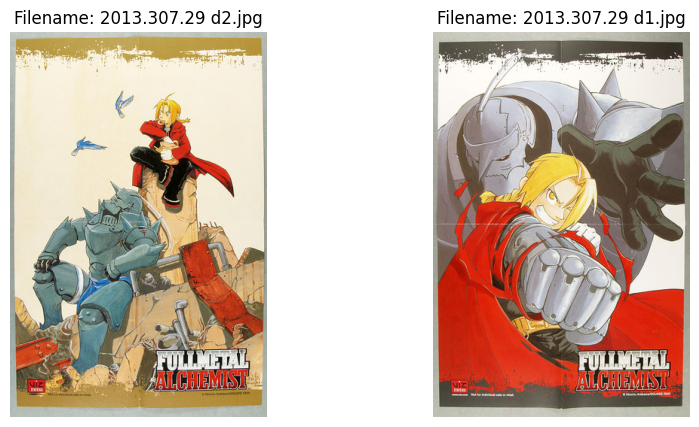

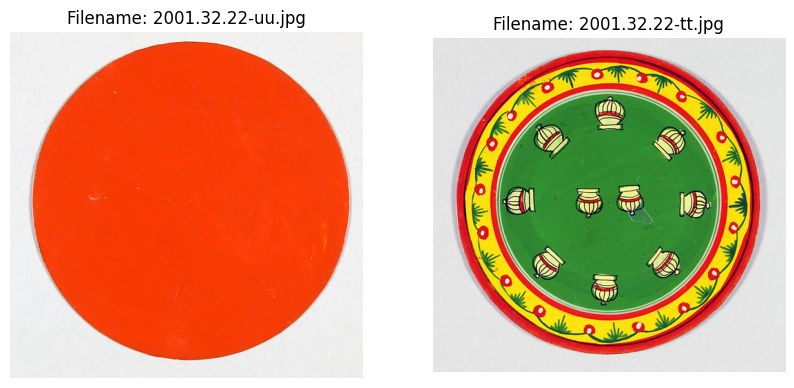

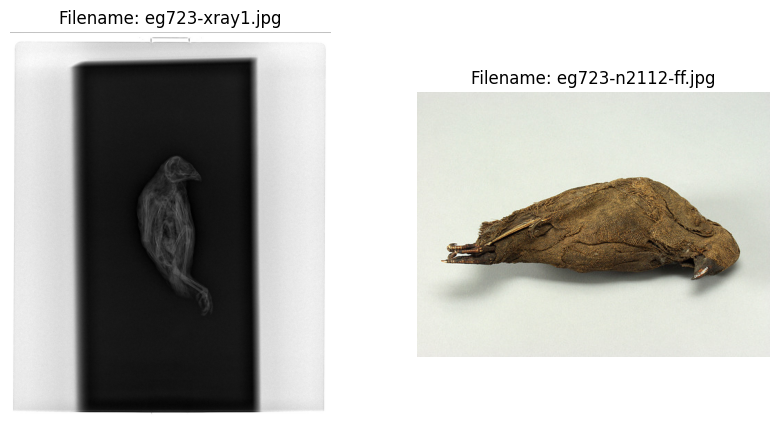

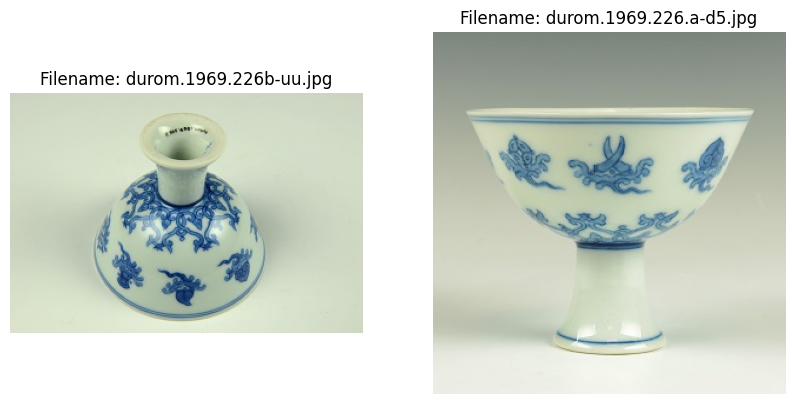

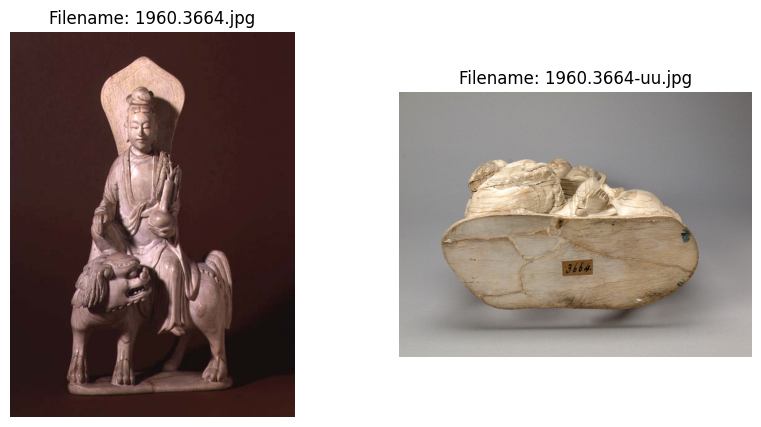

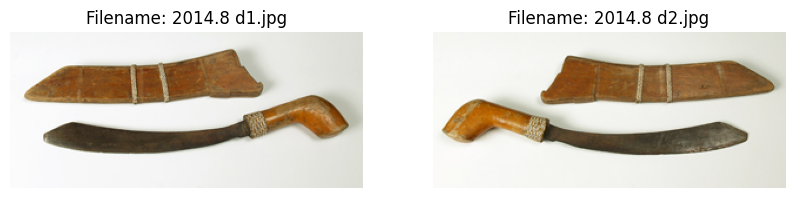

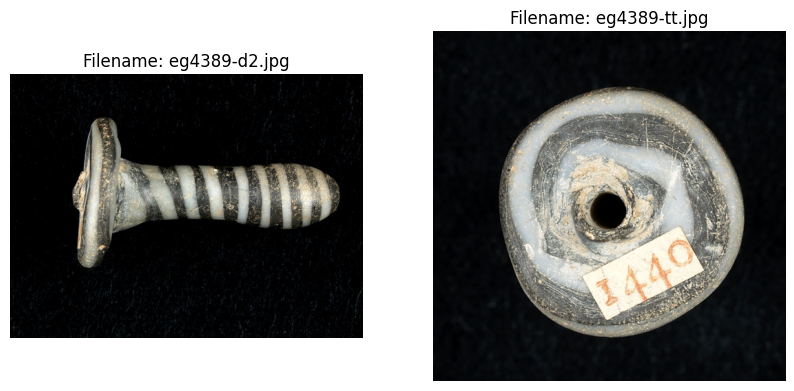

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

multi_df = file_df[file_df["obj_num"].duplicated(keep=False)]
multi_obj_nums = multi_df["obj_num"].unique()


# Randomly select 5 multi_obj_nums
random_multi_obj_nums = random.sample(list(multi_obj_nums), 10)

# Find the associated files for each multi_obj_num
associated_files = file_df[file_df["obj_num"].isin(random_multi_obj_nums)]

# Display the images of two files for each multi_obj_num
for obj_num in random_multi_obj_nums:
    files = associated_files[associated_files["obj_num"] == obj_num].sample(2)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    for i, (_, file) in enumerate(files.iterrows()):
        filepath = os.path.join(file["root"], file["file"])
        image = mpimg.imread(filepath)
        axs[i].imshow(image)
        axs[i].set_title(f"Filename: {file['file']}")
        axs[i].axis("off")
    plt.show()

Eyeballing the images, the matching seems to have worked. Although the naming is such that eg723, for example, contains an xray as well as a photo of a bird. Correct but very different images.